## **Career Track Analysis with SQL and Tableau Project**

#### **Case Description**
One of the functionalities the 365 company introduced in a 2021 platform release included the option for student enrollment in a career track. The tracks represent an ordinal sequence of courses that eventually lead to obtaining the skills for one of three job titles: data scientist, data analyst, or business analyst.

Completing a career track on the platform is a challenging task. To acquire a corresponding career certificate, a student must pass nine course exams (seven compulsory and two elective courses) and sit for a career track exam encompassing topics from all seven required courses.

In this Career Track Analysis with SQL and Tableau project, you’re tasked with analyzing the career track enrollments and achievements of 365’s students. You’ll first need to retrieve the necessary information from an SQL database. Afterward, you’ll feed this information to Tableau, visualize the results, and finally interpret them.
***

In this Career Track Analysis with SQL and Tableau project, you’re tasked with analyzing the career track enrollments and completions of 365’s students. You’ll first need to retrieve the necessary information from an SQL database. Afterward, you’ll feed this information to Tableau and visualize the results.

Study the sql_and_tableau database, consisting of the following tables:

**career_track_info**
1. track_id – the unique identification of a track, which serves as the primary key to the table
2. track_name – the name of the track

**career_track_student_enrollments**
1. student_id – the unique identification of a student
2. track_id – the unique identification of a track. Together with the previous column, they make up the primary key to the table—i.e., each student can enroll in a specific track only once. But a student can enroll in more than one career track.
3. date_enrolled – the date the student enrolled in the track. A student can enroll in more than one career track.
4. date_completed – the date the student completed the track. If the track is not completed, the field is NULL.
***

Connecting the MySQL Database to Python Environment

In [1]:
import pandas as pd
import numpy as np
import mysql.connector

In [2]:
mydb = mysql.connector.connect(
host = 'localhost',
user = 'root',
passwd = 'your MySQL Workbench password',
database = 'sql_and_tableau'
)

In [3]:
mycursor = mydb.cursor()
def sql_df(yourQuery):
    mycursor.execute(yourQuery)
    myresult = mycursor.fetchall()
    df = pd.DataFrame(myresult, columns = mycursor.column_names)
    return df

## Table of career_track_info

In [4]:
sql_df('''
SELECT * FROM career_track_info;
''')

,track_id,track_name
0,1,Data Scientist
1,2,Data Analyst
2,3,Business Analyst


## Table of career_track_student_enrollments

In [5]:
sql_df('''
SELECT * FROM career_track_student_enrollments;
''')

,student_id,track_id,date_enrolled,date_completed
0,6,1,2022-09-16,None
1,6,3,2022-09-16,None
2,20,2,2022-02-25,None
3,31,2,2022-04-02,None
4,209,1,2022-01-28,None
...,...,...,...,...
10436,295421,1,2022-10-20,None
10437,295448,2,2022-10-20,None
10438,295456,3,2022-10-20,None
10439,295496,2,2022-10-20,None


## Join the tables

In [6]:
sql_df('''
SELECT 
    *
FROM
    career_track_student_enrollments e
        JOIN
    career_track_info i ON e.track_id = i.track_id;
''')

,student_id,track_id,date_enrolled,date_completed,track_id,track_name
0,6,1,2022-09-16,None,1,Data Scientist
1,6,3,2022-09-16,None,3,Business Analyst
2,20,2,2022-02-25,None,2,Data Analyst
3,31,2,2022-04-02,None,2,Data Analyst
4,209,1,2022-01-28,None,1,Data Scientist
...,...,...,...,...,...,...
10436,295421,1,2022-10-20,None,1,Data Scientist
10437,295448,2,2022-10-20,None,2,Data Analyst
10438,295456,3,2022-10-20,None,3,Business Analyst
10439,295496,2,2022-10-20,None,2,Data Analyst


In [7]:
sql_df('''
SELECT
        ROW_NUMBER() OVER (ORDER BY student_id, track_name DESC) AS student_track_id,
        e.student_id,
        i.track_name,
        e.date_enrolled,
        e.date_completed,
        IF(e.date_completed IS NULL, 0, 1) AS track_completed,
        DATEDIFF(e.date_completed, e.date_enrolled) AS days_for_completion
    FROM
        career_track_student_enrollments e
    JOIN
        career_track_info i ON e.track_id = i.track_id;
''')

,student_track_id,student_id,track_name,date_enrolled,date_completed,track_completed,days_for_completion
0,1,6,Data Scientist,2022-09-16,None,0,NaN
1,2,6,Business Analyst,2022-09-16,None,0,NaN
2,3,20,Data Analyst,2022-02-25,None,0,NaN
3,4,31,Data Analyst,2022-04-02,None,0,NaN
4,5,209,Data Scientist,2022-01-28,None,0,NaN
...,...,...,...,...,...,...,...
10436,10437,295421,Data Scientist,2022-10-20,None,0,NaN
10437,10438,295448,Data Analyst,2022-10-20,None,0,NaN
10438,10439,295456,Business Analyst,2022-10-20,None,0,NaN
10439,10440,295496,Data Analyst,2022-10-20,None,0,NaN


In [8]:
sql_df('''
SELECT
    student_track_id,
    student_id,
    track_name,
    date_enrolled,
    date_completed,
    track_completed,
    days_for_completion,
    CASE
        WHEN days_for_completion = 0 THEN 'Same day'
        WHEN days_for_completion BETWEEN 1 AND 7 THEN '1 to 7 days'
        WHEN days_for_completion BETWEEN 8 AND 30 THEN '8 to 30 days'
        WHEN days_for_completion BETWEEN 31 AND 60 THEN '31 to 60 days'
        WHEN days_for_completion BETWEEN 61 AND 90 THEN '61 to 90 days'
        WHEN days_for_completion BETWEEN 91 AND 365 THEN '91 to 365 days'
        WHEN days_for_completion > 365 THEN '366+ days'
    END AS completion_bucket
FROM (
    SELECT
        ROW_NUMBER() OVER (ORDER BY student_id, track_name DESC) AS student_track_id,
        e.student_id,
        i.track_name,
        e.date_enrolled,
        e.date_completed,
        IF(e.date_completed IS NULL, 0, 1) AS track_completed,
        DATEDIFF(e.date_completed, e.date_enrolled) AS days_for_completion
    FROM
        career_track_student_enrollments e
    JOIN
        career_track_info i ON e.track_id = i.track_id
) AS a;
''')

,student_track_id,student_id,track_name,date_enrolled,date_completed,track_completed,days_for_completion,completion_bucket
0,1,6,Data Scientist,2022-09-16,None,0,NaN,None
1,2,6,Business Analyst,2022-09-16,None,0,NaN,None
2,3,20,Data Analyst,2022-02-25,None,0,NaN,None
3,4,31,Data Analyst,2022-04-02,None,0,NaN,None
4,5,209,Data Scientist,2022-01-28,None,0,NaN,None
...,...,...,...,...,...,...,...,...
10436,10437,295421,Data Scientist,2022-10-20,None,0,NaN,None
10437,10438,295448,Data Analyst,2022-10-20,None,0,NaN,None
10438,10439,295456,Business Analyst,2022-10-20,None,0,NaN,None
10439,10440,295496,Data Analyst,2022-10-20,None,0,NaN,None


Save the table above into a csv file to your local storage, then we will use the file for analysis in Tableau

How many days did it take the student with the most extended completion period to complete a career track?

In [9]:
sql_df('''
SELECT MAX(days_for_completion) AS number_of_the_days
FROM (
    SELECT DATEDIFF(date_completed, date_enrolled) AS days_for_completion
    FROM career_track_student_enrollments
) AS max_completed;
''')

,number_of_the_days
0,482


Referring to the student in the previous question, what career track did the student complete?

In [10]:
sql_df('''
SELECT i.track_name
FROM career_track_info i
JOIN career_track_student_enrollments e
ON i.track_id = e.track_id
WHERE DATEDIFF(e.date_completed, e.date_enrolled) = (
    SELECT MAX(days_for_completion) AS number_of_the_days
    FROM (
        SELECT DATEDIFF(date_completed, date_enrolled) AS days_for_completion
        FROM career_track_student_enrollments
    ) AS max_completed
);
''')

,track_name
0,Data Analyst


How many track completions are there in total?

In [11]:
sql_df('''
WITH cte AS (
SELECT IF(date_completed IS NULL, 0, 1) AS track_completed FROM career_track_student_enrollments
)
SELECT
SUM(track_completed) AS n_of_track_completions FROM cte;
''')

,n_of_track_completions
0,123


## Data Analysis Using Matplotlin and Seaborn

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
path = 'C:\my_projects\Career Track Analysis with SQL and Tableau Project\career_track_completions.csv'
df = pd.read_csv(path)
df.head(10)

,student_track_id,student_id,track_name,date_enrolled,date_completed,track_completed,days_for_completion,completion_bucket
0,1,6,Data Scientist,2022-09-16,NaN,0,NaN,NaN
1,2,6,Business Analyst,2022-09-16,NaN,0,NaN,NaN
2,3,20,Data Analyst,2022-02-25,NaN,0,NaN,NaN
3,4,31,Data Analyst,2022-04-02,NaN,0,NaN,NaN
4,5,209,Data Scientist,2022-01-28,NaN,0,NaN,NaN
5,6,209,Business Analyst,2022-06-02,NaN,0,NaN,NaN
6,7,221,Data Analyst,2022-02-13,NaN,0,NaN,NaN
7,8,326,Data Analyst,2022-03-29,NaN,0,NaN,NaN
8,9,353,Data Analyst,2022-07-07,NaN,0,NaN,NaN
9,10,454,Data Analyst,2022-02-03,NaN,0,NaN,NaN


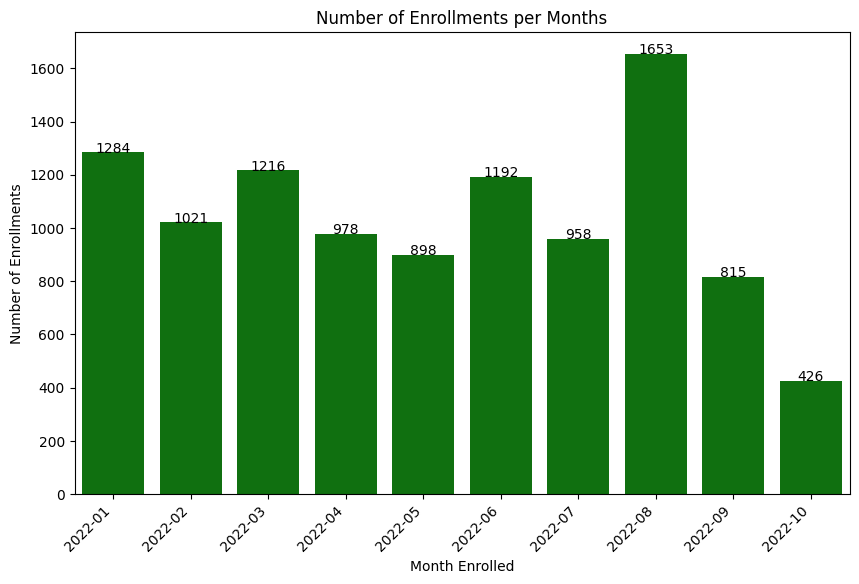

In [82]:
# Konversi kolom date_enrolled ke dalam format datetime dan buat kolom baru month
df['date_enrolled'] = pd.to_datetime(df['date_enrolled'])
df['month'] = df['date_enrolled'].dt.to_period('M')

# Hitung jumlah student_track_id per bulan
monthly_counts = df.groupby('month')['student_track_id'].count().reset_index()

# Buat visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='student_track_id', data=monthly_counts, color='green')

# Tambahkan label dan putar label tahun dan bulan
plt.title('Number of Enrollments per Months')
plt.xlabel('Month Enrolled')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45, ha='right')

# Tambahkan angka di atas setiap batang
for index, row in monthly_counts.iterrows():
    plt.text(index, row['student_track_id'], row['student_track_id'], color='black', ha="center")

plt.show()


overall, the highest number of enrollments was in August for all programs

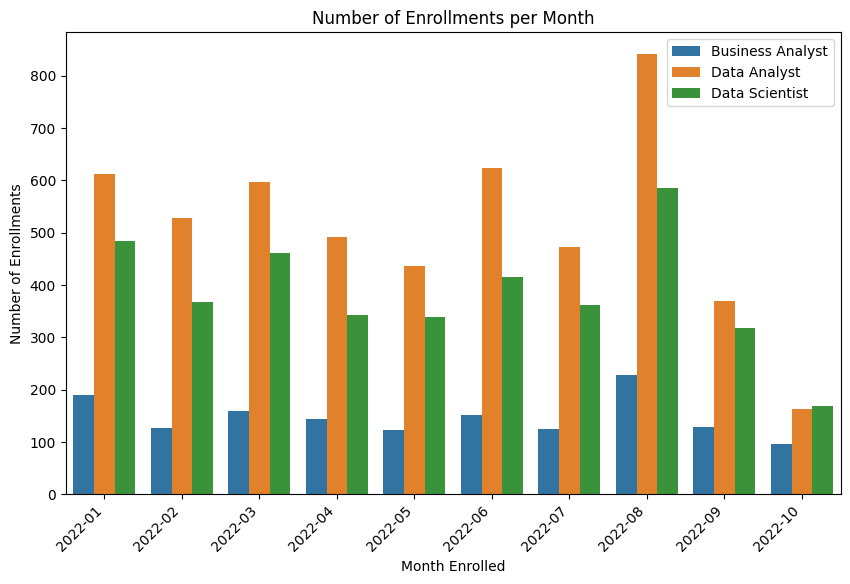

In [87]:
# Konversi kolom date_enrolled ke dalam format datetime dan buat kolom baru month
df['date_enrolled'] = pd.to_datetime(df['date_enrolled'])
df['month'] = df['date_enrolled'].dt.to_period('M')

# Hitung jumlah student_track_id per bulan dan track_name
monthly_counts = df.groupby(['month', 'track_name'])['student_track_id'].count().reset_index()

# Buat visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='student_track_id', hue='track_name', data=monthly_counts)

# Tambahkan label dan putar label tahun dan bulan
plt.title('Number of Enrollments per Month')
plt.xlabel('Month Enrolled')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45, ha='right')

# Tambahkan legenda
plt.legend(loc='best')

plt.show()

Based on the barchart above, we can see that the majority of students register for the Data Analyst program, followed by Data Scientist and the program with the lowest enrollment is Business Analyst.

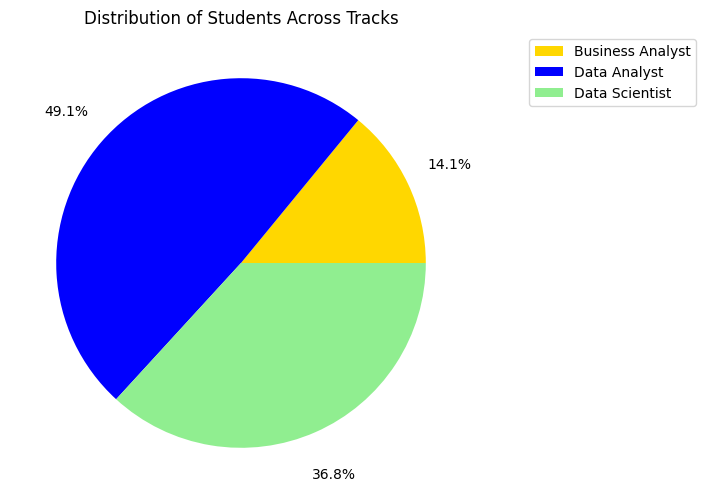

In [104]:
df_track_name=df.groupby('track_name')['student_track_id'].count().reset_index()
labels = df_track_name['track_name']

fig,ax=plt.subplots(figsize=(10, 6))
ax.pie(df_track_name['student_track_id'], colors = ['gold','blue','lightgreen'],
        autopct='%1.1f%%', pctdistance=1.25)

ax.set_aspect('equal')

plt.title('Distribution of Students Across Tracks')
ax.legend(labels, bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Based on the pie chart above, it can be seen that Data Analysts have the highest proportion, namely around 49.1%, followed by Data Scientists with a proportion of around 36.8% and the lowest proportion is Business Analysis, namely 14.1%.

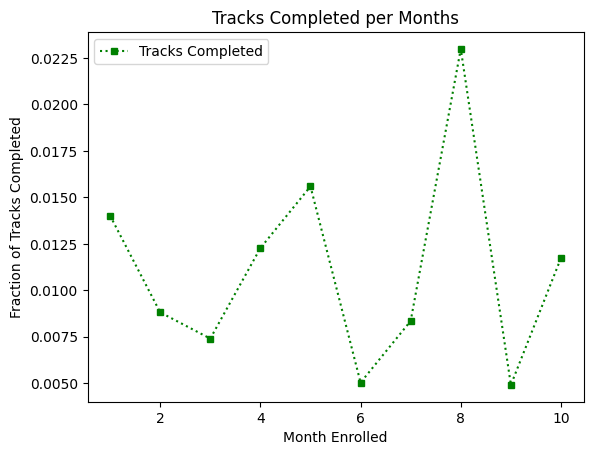

In [73]:
df['date_enrolled'] = pd.to_datetime(df['date_enrolled'])
df['month'] = df['date_enrolled'].dt.month

df_monthly_track_completed = df.groupby(['month'])['track_completed'].agg('mean')

#Create figure and axes
fig, ax = plt.subplots()

#Changing the index type to integer
df_monthly_track_completed.index = df_monthly_track_completed.index.map(int)

ax.plot(df_monthly_track_completed, 
        marker='s', 
        markersize=5, 
        color='green', 
        linestyle="dotted") 

ax.set_title('Tracks Completed per Months') 

ax.set_xlabel('Month Enrolled')
ax.set_ylabel('Fraction of Tracks Completed')
ax.legend(['Tracks Completed'])

plt.show()

Based on the line chart above, we can see that the proportion of track_completed is fluctuating. However, the highest completed_track occurred in August. This may happen because the highest number of enrollments is also in August, so this variable may have a correlation.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


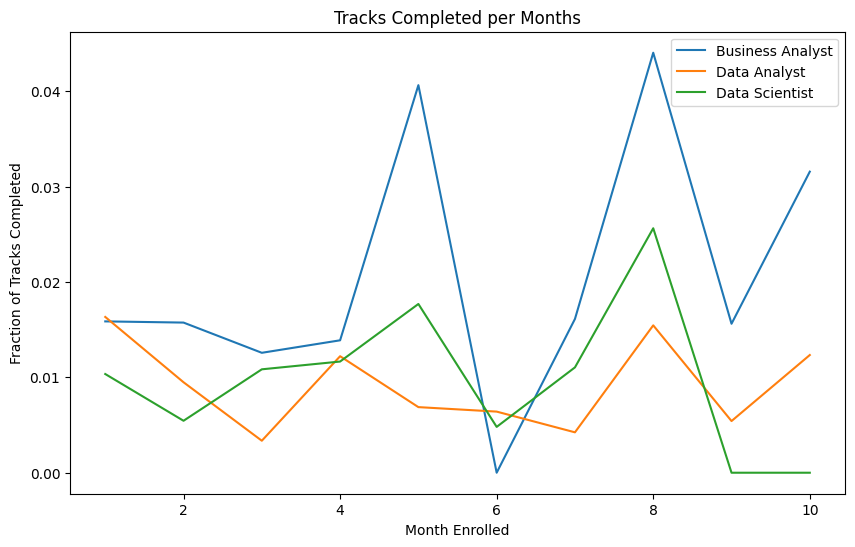

In [75]:
# Konversi kolom date_enrolled ke dalam format datetime dan buat kolom baru month
df['date_enrolled'] = pd.to_datetime(df['date_enrolled'])
df['month'] = df['date_enrolled'].dt.month

# Hitung jumlah student_track_id per bulan dan track_name
df_monthly_track_completed = df.groupby(['month', 'track_name'])['track_completed'].mean().reset_index()

# Buat visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='track_completed', hue='track_name', data=df_monthly_track_completed)

# Tambahkan label dan putar label tahun dan bulan
plt.title('Tracks Completed per Months')
plt.xlabel('Month Enrolled')
plt.ylabel('Fraction of Tracks Completed')
# Tambahkan legenda
plt.legend(loc='best')

plt.show()

Based on the line chart above, we can see that the majority of students who take the business analyst program have a higher track_completed proportion, followed by students who take the data scientist program and the lowest track_completed are students who take the data analyst program.

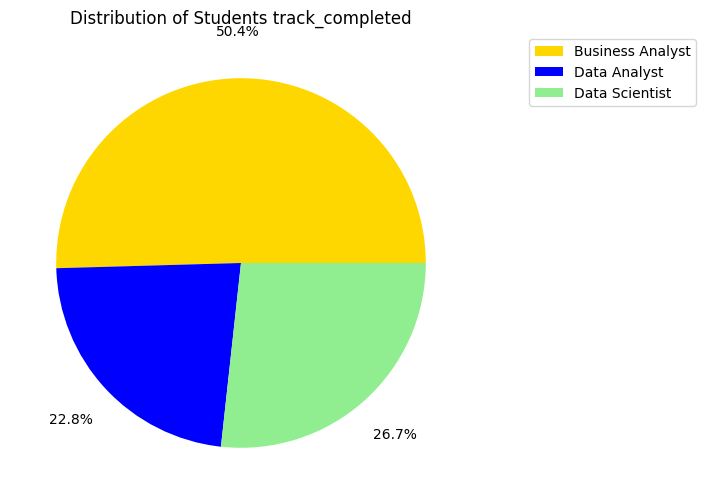

In [109]:
mean_track_completed=df.groupby('track_name')['track_completed'].mean().reset_index()
labels = mean_track_completed['track_name']

fig,ax=plt.subplots(figsize=(10, 6))
ax.pie(mean_track_completed['track_completed'], colors = ['gold','blue','lightgreen'],
        autopct='%1.1f%%', pctdistance=1.25)

ax.set_aspect('equal')

plt.title('Distribution of Students track_completed')
ax.legend(labels, bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Based on the pie chart above, we can clearly see the difference in the proportion of track_completed for each track_name, where students who take the business analyst program have a track_completed of 50.4%, followed by students who take the data scientist program with a track_completed proportion of 26.7 % and the smallest proportion are students who take the data analyst program with a track_completed proportion of 22.8%.

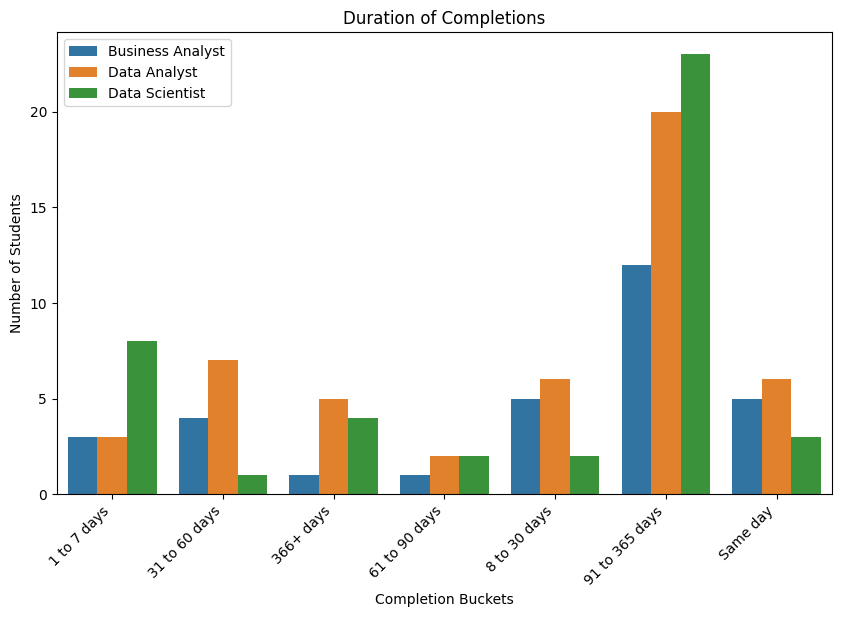

In [85]:
# Hitung jumlah student_id per completion_bycket dan track_name
df_completion_bucket = df.groupby(['completion_bucket', 'track_name'])['student_id'].count().reset_index()

# Buat visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='completion_bucket', y='student_id', hue='track_name', data=df_completion_bucket)

# Tambahkan label dan putar label tahun dan bulan
plt.title('Duration of Completions')
plt.xlabel('Completion Buckets')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')

# Tambahkan legenda
plt.legend(loc='best')

plt.show()

Based on the bar chart above, either business analyst, data analyst or data scientist programs, most students complete the program within 91 to 364 days.

## Problem finding

The majority of students enroll for the data analyst program, namely around 49.1%, this figure is the highest percentage compared to the other two programs, namely data scientists have a proportion of enrollments of around 36.8% and business analysts have a proportion of enrollments of around 14.1%.

However, students who enrolled in the data analyst program had the lowest track_completed average, namely around 22.8%, this figure is the lowest percentage compared to the other 2 programs. 

To answer why this happens, we need relevant data for further analysis, such as ratings for each program that describe student satisfaction on the program and the other relevant data that usefull.